In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import trackpy as tp

In [51]:
video1 = '5X_ph_9fps_R1.avi'
video2 = '10X_LD_R1.avi'

5.0
(1024, 1024)
(1024, 1024)


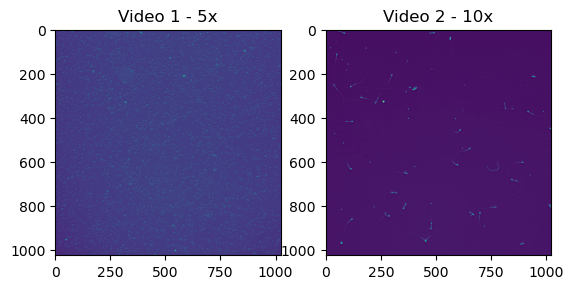

In [103]:
# Visualize the input
cap1 = cv.VideoCapture(video1)
cap2 = cv.VideoCapture(video2)

fps1 = cap1.get(cv.CAP_PROP_FPS)
fps2 = cap2.get(cv.CAP_PROP_FPS)

# Get the first frame
ret1, frame1 = cap1.read()
ret2, frame2 = cap2.read()

# Convert to grayscale
gray1 = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)


# Show frame1
print(gray1.shape)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(gray1)
plt.title('Video 1 - 5x')

# Show frame2
print(gray2.shape)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(gray2)
plt.title('Video 2 - 10x')

plt.show()

                y            x         mass        size         ecc  \
count  130.000000   130.000000   130.000000  130.000000  130.000000   
mean   503.922855   474.410241   492.888575    1.654173    0.328283   
std    282.800359   302.947836   318.215919    0.175153    0.165322   
min      3.518952    20.239971   101.229058    1.251373    0.028648   
25%    265.273824   200.766355   224.459942    1.488837    0.195984   
50%    528.141495   458.865290   458.423021    1.689843    0.313420   
75%    792.463455   748.158413   714.181336    1.806802    0.457045   
max    973.873318  1017.868617  1142.855409    1.927690    0.658881   

           signal     raw_mass          ep  
count  130.000000   130.000000  130.000000  
mean    48.342040  2541.453846    0.024565  
std     29.403785  1071.114330    0.024110  
min      7.850417  1202.000000    0.003890  
25%     20.762286  1691.000000    0.008037  
50%     48.548630  2248.500000    0.015612  
75%     72.926240  3366.500000    0.029482  


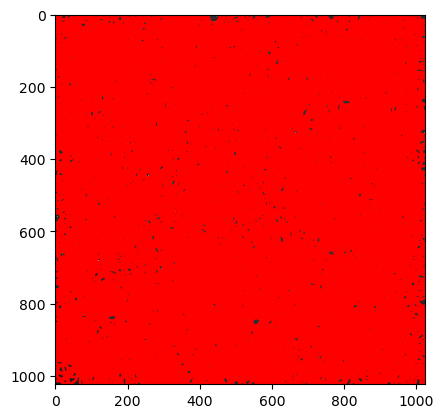

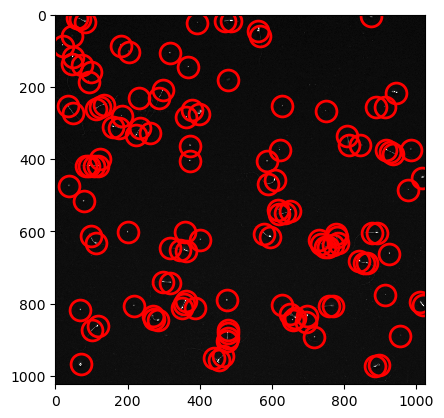

<Axes: >

In [104]:
f1 = tp.locate(gray1, diameter=5, minmass=50, maxsize=5)
f2 = tp.locate(gray2, diameter=7, minmass=100, maxsize=5)
#f = tracker.determineCentroids_morphology(np.expand_dims(frame,0))

#print(f.head())

print(f2.describe())

# Visualize
tp.annotate(f1, gray1)
tp.annotate(f2, gray2)

In [84]:
def generate_histogram(data, title, xlabel):
    plt.figure()
    plt.hist(data, bins='auto', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [88]:
def summarize_stats(csvfile):
    """
    Summarize the VAP statistics from a CSV file.

    Parameters:
    csvfile (str): Path to the CSV file containing sperm tracking data with a column "VAP".

    """
    try:
        # Load the data from the CSV file
        data = pd.read_csv(csvfile)
    except (FileNotFoundError, pd.errors.EmptyDataError, pd.errors.ParserError) as e:
        print(f"Error loading CSV file: {e}")
        return
     # Check if 'VAP' and 'VCL' columns exist
    if 'VAP' not in data.columns or 'VCL' not in data.columns:
        print("Error: The CSV file does not contain 'VAP' and 'VCL' columns.")
        return

    # Extract VAP and VCL values
    vaps = data['VAP'].dropna()  # Drop any NaN values
    vcls = data['VCL'].dropna()  # Drop any NaN values

    if vaps.empty or vcls.empty:
        print("No VAP or VCL data available in the CSV file.")
        return

    # Calculate mean and range for VAP
    mean_vap = np.mean(vaps)
    range_vap = (np.min(vaps), np.max(vaps))

    # Calculate mean and range for VCL
    mean_vcl = np.mean(vcls)
    range_vcl = (np.min(vcls), np.max(vcls))

    # Print summary
    print("Summary of VAP and VCL Statistics:"+ csvfile)
    print(f"Average Path Velocity (VAP):")
    print(f"  Mean: {mean_vap:.2f}")
    print(f"  Range: {range_vap[0]:.2f} - {range_vap[1]:.2f}")
    print(f"Curvilinear Velocity (VCL):")
    print(f"  Mean: {mean_vcl:.2f}")
    print(f"  Range: {range_vcl[0]:.2f} - {range_vcl[1]:.2f}")


  # Generate histograms
    generate_histogram(vaps, "Average Path Velocity (VAP)", "VAP (microns/second)")
    generate_histogram(vcls, "Curilinear Velocity (VCL)", "VCL (microns/second)")

Summary of VAP and VCL Statistics:5X_ph_9fps_R1.csv
Average Path Velocity (VAP):
  Mean: 15.94
  Range: 0.26 - 38.76
Curvilinear Velocity (VCL):
  Mean: 16.28
  Range: 0.37 - 38.85


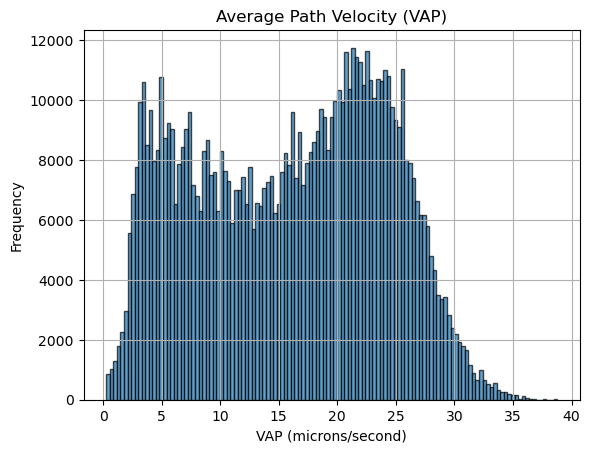

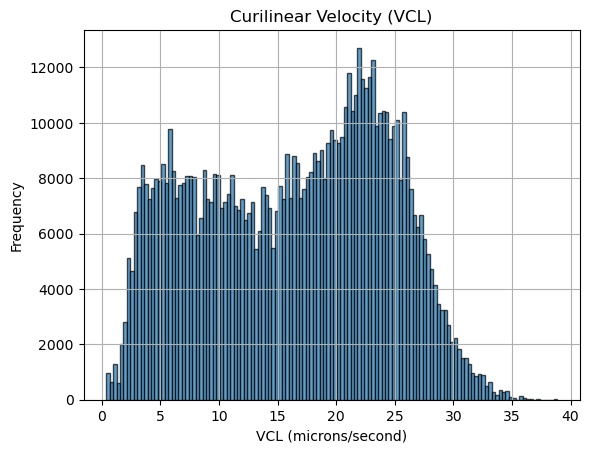

Summary of VAP and VCL Statistics:10X_LD_R1.csv
Average Path Velocity (VAP):
  Mean: 2.85
  Range: 0.11 - 20.79
Curvilinear Velocity (VCL):
  Mean: 2.84
  Range: 0.11 - 18.90


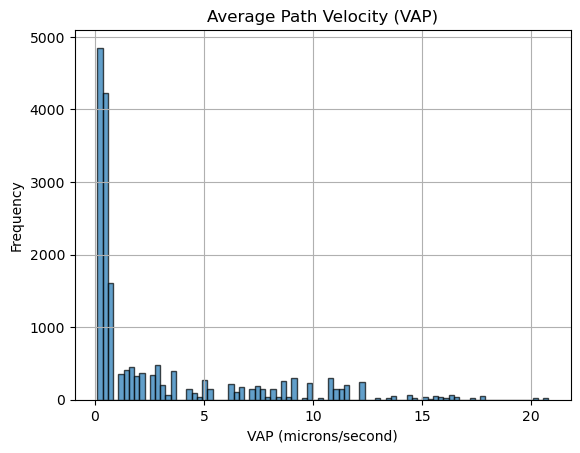

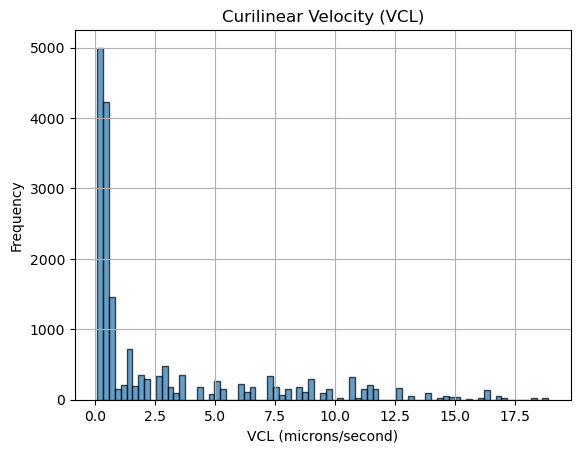

Summary of VAP and VCL Statistics:10X_HD_R5.csv
Average Path Velocity (VAP):
  Mean: 3.28
  Range: 0.12 - 20.14
Curvilinear Velocity (VCL):
  Mean: 3.28
  Range: 0.12 - 17.92


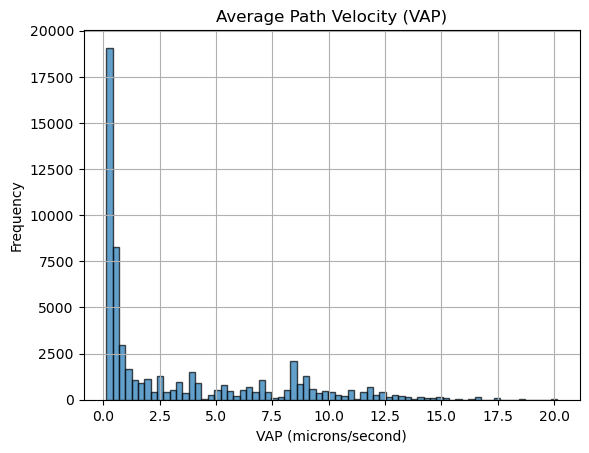

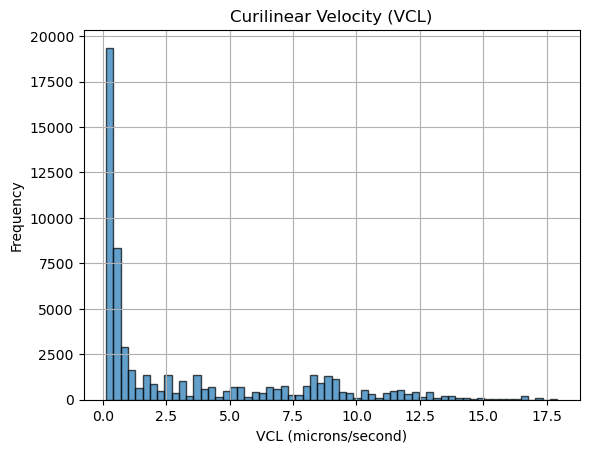

In [90]:
summarize_stats(video1[:-4] + '.csv')
summarize_stats(video2[:-4] + '.csv')
summarize_stats('10X_HD_R5.csv')